# 13. Information Theory

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/13.InformationTheory.ipynb)

Based on https://machinelearningmastery.com/what-is-information-entropy/.

Before we delve into classification and decision trees, we will look at information theory and the concepts how we measure information.

<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/CoinToss.jpg?raw=1" alt="Coin Toss" align="center" style="width:150px; float:right"/>

### Information in a coin flip
Consider a flip of a single fair coin. The probability of heads (and tails) is 0.5. We can calculate the information for flipping a head in Python using the `log2()` function.

In [1]:
# Calculate the information for a coin flip
from math import log2
p = 0.5                                             # Probability of the event
h = -log2(p)                                        # Calculate information for event
print('p(x)=%.3f, information: %.3f bits' % (p, h)) 

p(x)=0.500, information: 1.000 bits


Running the example prints shows that for the event with a probability of 50% the information content is 1 bit. If the same coin was flipped $n$ times, then the information for a specific sequence of flips would be $n$ bits.

<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/InformationEntropy.jpg?raw=1" alt="Information Entropy" align="center" style="width:300px; float:center"/>

Consider if the coin was not fair and the probability of a head was instead 10% (0.1). What would the information be for this event?

The event would be more rare and would require more than 3 bits of information.

### Information in rolling a dice

<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/Dice.jpg?raw=1" alt="Dice" align="center" style="width:150px; float:right"/>

We can also explore the information in a single roll of a fair six-sided dice, e.g., the information in rolling a 6.

We know the probability of rolling any number is 1/6, which is a smaller number than 1/2 for a coin flip, therefore we would expect more surprise or a larger amount of information.

In [2]:
# Calculate the information for a dice roll
from math import log2
p = 1.0 / 6.0                                       # Probability of the event
h = -log2(p)                                        # Calculate information for event
print('p(x)=%.3f, information: %.3f bits' % (p, h)) # Print the result

p(x)=0.167, information: 2.585 bits


Our intuition is correct and, indeed, there is more than 2.5 bits of information in a single roll of a fair dice.

Other logarithms can be used instead of the base 2. For example, it is also common to use the natural logarithm that uses base $e$ (Euler’s number) in calculating the information, in which case the units are referred to as "nats." When using base 10, the units are called "hartley" (Hart), "ban" or "dit."

We can further develop the intuition that low probability events have more information.

To make this clear, we can calculate the information for probabilities between 0 and 1 and plot the corresponding information for each. We can then create a plot of probability vs information. We would expect the plot to curve downward from low probabilities with high information to high probabilities with low information.

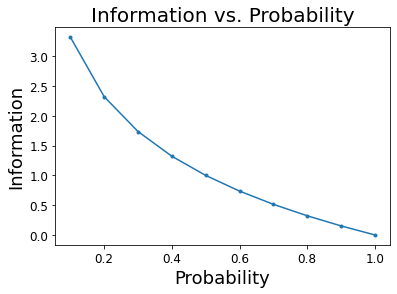

In [3]:
# Compare probability vs information entropy
from math import log2
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

# List of probabilities
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate information
info = [-log2(p) for p in probs]

# Plot probability vs information
plt.plot(probs, info, marker='.')
plt.title('Information vs. Probability', fontsize=20)
plt.xlabel('Probability', fontsize=18)
plt.ylabel('Information', fontsize=18)
plt.show()

Low probability events are more surprising and carry more information, and the complement of high probability events carry less information.

This relationship is not linear, it is in-fact slightly sub-linear. This makes sense given the use of the log function.

### Calculate the Entropy for a Random Variable

We can also quantify how much information there is in a random variable.

For example, if we wanted to calculate the information for a random variable $X$ with probability distribution $P(X)$. Calculating the information for a random variable is the same as calculating the information for the probability distribution of the events for the random variable.

Calculating the information for a random variable is called **information entropy**, **Shannon entropy**, or simply **entropy**. It is related to the idea of entropy from physics by analogy, in that both are concerned with uncertainty.

The intuition for entropy is that it is the average number of bits required to represent or transmit an event drawn from the probability distribution for the random variable.

The entropy for a random variable $X$ with $k \in K$ discrete states as follows:
$$
H(X) = - \sum_{k \in K} P(k) \, \log_2 \left ( P(k) \right ).
$$

This equation should remind you of the **entropy of mixing for an ideal alloy**. The entropy is the negative of the sum of the probability of each event multiplied by the log of the probability of each event.

Like information, the `log()` function uses base-2 and the units are bits.

The lowest entropy is calculated for a random variable that has a single event with a probability of 1.0, a certainty. The largest entropy for a random variable will be if all events are equally likely.

We can consider a roll of a fair die and calculate the entropy for the variable. Each outcome has the same probability of 1/6, therefore it is a uniform probability distribution. We therefore would expect the average information to be the same information for a single event calculated in the previous section.

In [4]:
# Calculate the entropy for a dice roll
from math import log2
n = 6                                            # The number of events
p = 1.0/n                                        # Probability of one event
entropy = -sum([p * log2(p) for _ in range(n)])  # Calculate entropy
print('entropy: %.3f bits' % entropy)            # Print the result

entropy: 2.585 bits


The entropy is the same as the information for a single outcome. This makes sense, as the average information is the same since all outcomes are equally likely.

If we know the probability for each event, we can use the `entropy()` SciPy function to calculate the entropy directly.

In [5]:
# Calculate the entropy for a dice roll
from scipy.stats import entropy
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]      # discrete probabilities
e = entropy(p, base=2)                  # calculate entropy
print('entropy: %.3f bits' % e)         # print the result

entropy: 2.585 bits


We can further develop the intuition for entropy of probability distributions.

Recall that entropy is the number of bits required to represent a randomly drawn even from the distribution, e.g., an average event. We can explore this for a simple distribution with two events, like a coin flip, but explore different probabilities for these two events and calculate the entropy for each.

In the case where one event dominates, such as a skewed probability distribution, then there is less surprise and the distribution will have a lower entropy. In the case where no event dominates another, such as equal or approximately equal probability distribution, then we would expect larger or maximum entropy.

- **Skewed Probability Distribution** (unsurprising): Low entropy.
- **Balanced Probability Distribution** (surprising): High entropy.

If we transition from skewed to equal probability of events in the distribution we would expect entropy to start low and increase, specifically from the lowest entropy of 0.0 for events with impossibility/certainty (probability of 0 and 1 respectively) to the largest entropy of 1.0 for events with equal probability.

The example below implements this, creating each probability distribution in this transition, calculating the entropy for each and plotting the result.

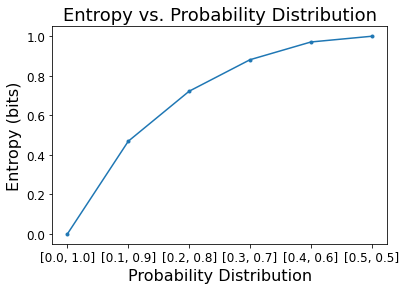

In [6]:
# Compare probability distributions vs entropy
from math import log2
from matplotlib import pyplot

def entropy(events, ets=1e-15):                      # Calculate entropy
	return -sum([p * log2(p + ets) for p in events])

probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]               # Define probabilities
dists = [[p, 1.0 - p] for p in probs]                # Create probability distribution

ents = [entropy(d) for d in dists]                   # Calculate entropy for each distribution

pyplot.plot(probs, ents, marker='.')                 # Plot probability distribution vs entropy
pyplot.title('Entropy vs. Probability Distribution', fontsize=18)
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution', fontsize=16)
pyplot.ylabel('Entropy (bits)', fontsize=16)
pyplot.show()

The example creates the 6 probability distributions from [0,1] to [0.5,0.5] probabilities.

As expected, we see that as the distribution of events changes from skewed to balanced, the entropy increases from minimal to maximum values. That is, if the average event drawn from a probability distribution is not surprising we get a lower entropy, whereas if it is surprising, we get a larger entropy.

We can see that the transition is not linear, that it is super linear. We can also see that this curve is symmetrical if we continued the transition to [0.6, 0.4] and onward to [1.0, 0.0] for the two events, forming an inverted parabola-shape.

Note we had to add a tiny value to the probability when calculating the entropy to avoid calculating the log of a zero value, which would result in an infinity on not a number.

Calculating the entropy for a random variable provides the basis for other measures such as **mutual information** (information gain).

Entropy also provides the basis for calculating the difference between two probability distributions with **cross-entropy** and the **KL-divergence**.